## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [1]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [7]:
# your code here
for value in [5., 8.]:
    x1 = torch.tensor([value], requires_grad=True)
    
    sigmoid = torch.nn.Sigmoid()
    y1 = sigmoid(x1)
    y1.backward()
    print("gradient of sigmoid in " + str(x1.item()) + " computed with pytorch: " + str(x1.grad.item()))
    
    # the derivative of 1/(1+e^(-x)) is (e^(-x))/((1+e^(-x))^2)
    e = 2.7182818284590452353602874713526624977572470936999595749
    y2 = e ** (-x1) / (1 + e ** (-x1)) ** 2
    print("gradient of sigmoid in " + str(x1.item()) + " computed with derivative: " + str(y2.item()))

gradient of sigmoid in 5.0 computed with pytorch: 0.0066480329260230064
gradient of sigmoid in 5.0 computed with derivative: 0.006648057606071234
gradient of sigmoid in 8.0 computed with pytorch: 0.00033522327430546284
gradient of sigmoid in 8.0 computed with derivative: 0.0003352377680130303


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [8]:
# your code here
# WHAT FUNCTIONS DOES IT ASK? f(x)=x?
for value in [-2., 5., 8.]:
    x1 = torch.tensor([value], requires_grad=True)

    y1 = x1
    y1.backward()
    print("gradient of the linear activation function in " + str(x1.item()) + " computed with pytorch: " + str(x1.grad.item()))
    
    # the derivative of x is 1
    y2 = 1
    print("gradient of the linear activation function in " + str(x1.item()) + " computed with derivative: " + str(y2))

gradient of the linear activation function in -2.0 computed with pytorch: 1.0
gradient of the linear activation function in -2.0 computed with derivative: 1
gradient of the linear activation function in 5.0 computed with pytorch: 1.0
gradient of the linear activation function in 5.0 computed with derivative: 1
gradient of the linear activation function in 8.0 computed with pytorch: 1.0
gradient of the linear activation function in 8.0 computed with derivative: 1


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [9]:
# your code here
for value in [-5., 8.]:
    x1 = torch.tensor([value], requires_grad=True)
    
    relu = torch.nn.ReLU()
    y1 = relu(x1)
    y1.backward()
    print("gradient of relu in " + str(x1.item()) + " computed with pytorch: " + str(x1.grad.item()))
    
    # the derivative of max(0, x) is: 0 when x<0, 1 when x>0
    #e = 2.7182818284590452353602874713526624977572470936999595749
    y2 = 0.
    if x1 > 0:
        y2 = 1.
    print("gradient of relu in " + str(x1.item()) + " computed with derivative: " + str(y2))

gradient of relu in -5.0 computed with pytorch: 0.0
gradient of relu in -5.0 computed with derivative: 0.0
gradient of relu in 8.0 computed with pytorch: 1.0
gradient of relu in 8.0 computed with derivative: 1.0


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

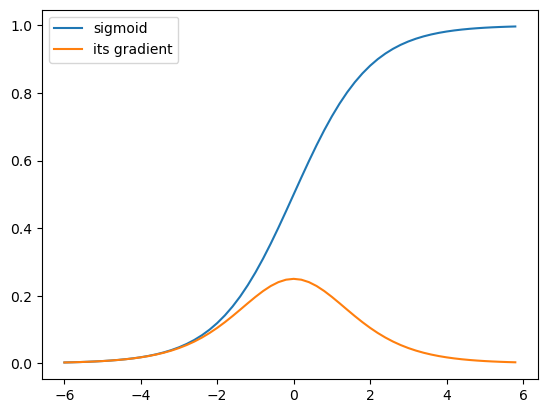

In [11]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

def plot_sigmoid(x1, x2, step):
    x_coordinates = np.arange(x1, x2, step)
    
    sigmoid = torch.nn.Sigmoid()
    
    plt.plot(x_coordinates, sigmoid(torch.tensor(x_coordinates)), label='sigmoid')

    y_derivative = []
    for x in x_coordinates:
        x_tensor = torch.tensor([x], requires_grad=True)
        y = sigmoid(x_tensor)
        y.backward()
        y_derivative.append(x_tensor.grad)
    plt.plot(x_coordinates, torch.tensor(y_derivative), label='its gradient')
    plt.legend()
plot_sigmoid(-6, 6, 0.2)

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

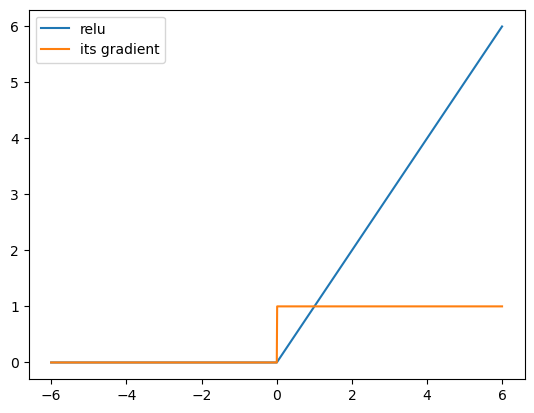

In [13]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

def plot_relu(x1, x2, step):
    x_coordinates = np.arange(x1, x2, step)
    
    relu = torch.nn.ReLU()
    
    plt.plot(x_coordinates, relu(torch.tensor(x_coordinates)), label='relu')

    y_derivative = []
    for x in x_coordinates:
        x_tensor = torch.tensor([x], requires_grad=True)
        y = relu(x_tensor)
        y.backward()
        y_derivative.append(x_tensor.grad)
    plt.plot(x_coordinates, torch.tensor(y_derivative), label='its gradient')
    plt.legend()
plot_relu(-6, 6, 0.01)

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

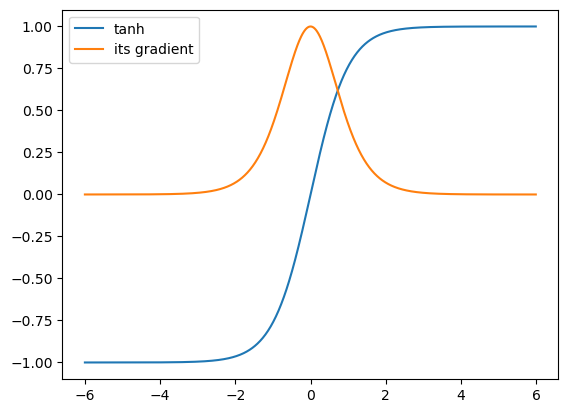

In [15]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

def plot_tanh(x1, x2, step):
    x_coordinates = np.arange(x1, x2, step)
    
    tanh = torch.nn.Tanh()
    
    plt.plot(x_coordinates, tanh(torch.tensor(x_coordinates)), label='tanh')

    y_derivative = []
    for x in x_coordinates:
        x_tensor = torch.tensor([x], requires_grad=True)
        y = tanh(x_tensor)
        y.backward()
        y_derivative.append(x_tensor.grad)
    plt.plot(x_coordinates, torch.tensor(y_derivative), label='its gradient')
    plt.legend()
plot_tanh(-6, 6, 0.01)

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

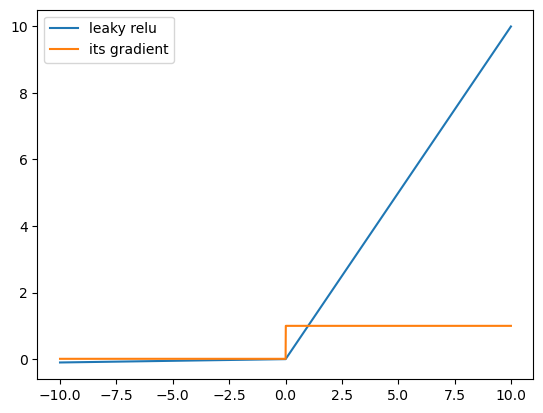

In [17]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

def plot_leaky_relu(x1, x2, step):
    x_coordinates = np.arange(x1, x2, step)
    
    leaky_relu = torch.nn.LeakyReLU()
    
    plt.plot(x_coordinates, leaky_relu(torch.tensor(x_coordinates)), label='leaky relu')

    y_derivative = []
    for x in x_coordinates:
        x_tensor = torch.tensor([x], requires_grad=True)
        y = leaky_relu(x_tensor)
        y.backward()
        y_derivative.append(x_tensor.grad)
    plt.plot(x_coordinates, torch.tensor(y_derivative), label='its gradient')
    plt.legend()
plot_leaky_relu(-10, 10, 0.01)

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [18]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [19]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.5647], grad_fn=<SigmoidBackward0>)


In [20]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()
print("input_data: " + str(input_data))
print("labels: " + str(labels))

# Train the model
num_epochs = 1000 * 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

input_data: tensor([[ 0.3592, -0.9672],
        [ 1.0345, -0.5140],
        [ 0.5345, -1.0720],
        [-0.8702,  1.2778],
        [-0.1499,  0.2679],
        [ 0.3462, -0.1981],
        [ 0.3334,  1.1785],
        [ 0.9790, -0.0358],
        [ 0.2480, -1.0006],
        [ 1.5560,  0.5860]])
labels: tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]])
Epoch [100/1000000], Loss: 0.5318
Epoch [200/1000000], Loss: 0.5156
Epoch [300/1000000], Loss: 0.5097
Epoch [400/1000000], Loss: 0.5072
Epoch [500/1000000], Loss: 0.5061
Epoch [600/1000000], Loss: 0.5056
Epoch [700/1000000], Loss: 0.5054
Epoch [800/1000000], Loss: 0.5053
Epoch [900/1000000], Loss: 0.5052
Epoch [1000/1000000], Loss: 0.5052
Epoch [1100/1000000], Loss: 0.5052
Epoch [1200/1000000], Loss: 0.5052
Epoch [1300/1000000], Loss: 0.5052
Epoch [1400/1000000], Loss: 0.5052
Epoch [1500/1000000], Loss: 0.5052
Epoch [1600/1000000], Loss: 0.5052
Epoch [

Epoch [22000/1000000], Loss: 0.5052
Epoch [22100/1000000], Loss: 0.5052
Epoch [22200/1000000], Loss: 0.5052
Epoch [22300/1000000], Loss: 0.5052
Epoch [22400/1000000], Loss: 0.5052
Epoch [22500/1000000], Loss: 0.5052
Epoch [22600/1000000], Loss: 0.5052
Epoch [22700/1000000], Loss: 0.5052
Epoch [22800/1000000], Loss: 0.5052
Epoch [22900/1000000], Loss: 0.5052
Epoch [23000/1000000], Loss: 0.5052
Epoch [23100/1000000], Loss: 0.5052
Epoch [23200/1000000], Loss: 0.5052
Epoch [23300/1000000], Loss: 0.5052
Epoch [23400/1000000], Loss: 0.5052
Epoch [23500/1000000], Loss: 0.5052
Epoch [23600/1000000], Loss: 0.5052
Epoch [23700/1000000], Loss: 0.5052
Epoch [23800/1000000], Loss: 0.5052
Epoch [23900/1000000], Loss: 0.5052
Epoch [24000/1000000], Loss: 0.5052
Epoch [24100/1000000], Loss: 0.5052
Epoch [24200/1000000], Loss: 0.5052
Epoch [24300/1000000], Loss: 0.5052
Epoch [24400/1000000], Loss: 0.5052
Epoch [24500/1000000], Loss: 0.5052
Epoch [24600/1000000], Loss: 0.5052
Epoch [24700/1000000], Loss:

Epoch [44900/1000000], Loss: 0.5052
Epoch [45000/1000000], Loss: 0.5052
Epoch [45100/1000000], Loss: 0.5052
Epoch [45200/1000000], Loss: 0.5052
Epoch [45300/1000000], Loss: 0.5052
Epoch [45400/1000000], Loss: 0.5052
Epoch [45500/1000000], Loss: 0.5052
Epoch [45600/1000000], Loss: 0.5052
Epoch [45700/1000000], Loss: 0.5052
Epoch [45800/1000000], Loss: 0.5052
Epoch [45900/1000000], Loss: 0.5052
Epoch [46000/1000000], Loss: 0.5052
Epoch [46100/1000000], Loss: 0.5052
Epoch [46200/1000000], Loss: 0.5052
Epoch [46300/1000000], Loss: 0.5052
Epoch [46400/1000000], Loss: 0.5052
Epoch [46500/1000000], Loss: 0.5052
Epoch [46600/1000000], Loss: 0.5052
Epoch [46700/1000000], Loss: 0.5052
Epoch [46800/1000000], Loss: 0.5052
Epoch [46900/1000000], Loss: 0.5052
Epoch [47000/1000000], Loss: 0.5052
Epoch [47100/1000000], Loss: 0.5052
Epoch [47200/1000000], Loss: 0.5052
Epoch [47300/1000000], Loss: 0.5052
Epoch [47400/1000000], Loss: 0.5052
Epoch [47500/1000000], Loss: 0.5052
Epoch [47600/1000000], Loss:

Epoch [67700/1000000], Loss: 0.5052
Epoch [67800/1000000], Loss: 0.5052
Epoch [67900/1000000], Loss: 0.5052
Epoch [68000/1000000], Loss: 0.5052
Epoch [68100/1000000], Loss: 0.5052
Epoch [68200/1000000], Loss: 0.5052
Epoch [68300/1000000], Loss: 0.5052
Epoch [68400/1000000], Loss: 0.5052
Epoch [68500/1000000], Loss: 0.5052
Epoch [68600/1000000], Loss: 0.5052
Epoch [68700/1000000], Loss: 0.5052
Epoch [68800/1000000], Loss: 0.5052
Epoch [68900/1000000], Loss: 0.5052
Epoch [69000/1000000], Loss: 0.5052
Epoch [69100/1000000], Loss: 0.5052
Epoch [69200/1000000], Loss: 0.5052
Epoch [69300/1000000], Loss: 0.5052
Epoch [69400/1000000], Loss: 0.5052
Epoch [69500/1000000], Loss: 0.5052
Epoch [69600/1000000], Loss: 0.5052
Epoch [69700/1000000], Loss: 0.5052
Epoch [69800/1000000], Loss: 0.5052
Epoch [69900/1000000], Loss: 0.5052
Epoch [70000/1000000], Loss: 0.5052
Epoch [70100/1000000], Loss: 0.5052
Epoch [70200/1000000], Loss: 0.5052
Epoch [70300/1000000], Loss: 0.5052
Epoch [70400/1000000], Loss:

KeyboardInterrupt: 

Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [68]:
class OrPerceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(OrPerceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
#         self.activation = torch.nn.ELU()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

In [69]:
input_size = 2
output_size = 1

or_perceptron = OrPerceptron(input_size, output_size)

In [70]:
criterion = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.SGD(or_perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

input_data = torch.tensor(1000 * [[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
input_data = input_data[torch.randperm(input_data.size()[0])]
print(input_data)

# input_data = torch.randint(0, 2, (100000, input_size)).float()
labels = []
for input in input_data:
    # print(str(input[0]) + " or " + str(input[1]) + "=" + str(input[0] or input[1]))
    labels.append([float(input[0] or input[1])])
labels = torch.tensor(labels)

print(input_data)
print(labels)

tensor([[0., 0.],
        [0., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]])
tensor([[0.],
        [0.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])


In [66]:
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = or_perceptron(input_data)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3652
Epoch [200/1000], Loss: 0.2806
Epoch [300/1000], Loss: 0.2317
Epoch [400/1000], Loss: 0.2035
Epoch [500/1000], Loss: 0.1847
Epoch [600/1000], Loss: 0.1712
Epoch [700/1000], Loss: 0.1609
Epoch [800/1000], Loss: 0.1528
Epoch [900/1000], Loss: 0.1462
Epoch [1000/1000], Loss: 0.1408


In [67]:
x = torch.tensor([0., 1.])
y = or_perceptron(x)
print(y)


tensor([2.7479], grad_fn=<EluBackward0>)


In [48]:
test_size = 10000

test_input_data = torch.randint(0, 2, (test_size, input_size)).float()
test_labels = []
for input in test_input_data:
    # print(str(input[0]) + " or " + str(input[1]) + "=" + str(input[0] or input[1]))
    test_labels.append([float(input[0] or input[1])])
test_labels = torch.tensor(test_labels)

correct = 0
for i in range(test_size):
    x = test_input_data[i]
    y = or_perceptron(x)
    y_final = 0
    if y >= 0.5:
        y_final = 1
    correct += (int(test_labels[i].item()) == y_final)
print("number of tests: " + str(test_size))
print("number of correct answers: " + str(correct))
print("accuracy: " + str(correct/ test_size))

number of tests: 10000
number of correct answers: 10000
accuracy: 1.0
